<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/tensorflow/computer-vision/7%20Visualising_intermediate_activations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
ls -lart

total 7980
drwxr-xr-x 4 root root    4096 Sep 14 13:43 .config/
drwxr-xr-x 1 root root    4096 Sep 14 13:44 sample_data/
drwxr-xr-x 1 root root    4096 Sep 22 03:23 ../
-rw-r--r-- 1 root root  151686 Sep 22 03:26 cat.jpg
drwxr-xr-x 1 root root    4096 Sep 22 03:26 ./
-rw-r--r-- 1 root root 7996440 Sep 22 03:27 cats_vs_dogs_with_data_aug3.keras


In [3]:
model = keras.models.load_model("cats_vs_dogs_with_data_aug3.keras")

In [4]:
model.summary()

Model: "CnDModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 180, 180, 3)]     0         
                                                                 
 RF (RandomFlip)             (None, 180, 180, 3)       0         
                                                                 
 RR (RandomRotation)         (None, 180, 180, 3)       0         
                                                                 
 RZ (RandomZoom)             (None, 180, 180, 3)       0         
                                                                 
 Rescaling_Layer (Rescaling)  (None, 180, 180, 3)      0         
                                                                 
 Conv2D1 (Conv2D)            (None, 178, 178, 32)      896       
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 89, 89, 32)        0  

In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
image = keras.utils.load_img("cat.jpg", target_size=(180,180,3))

In [7]:
image_as_np_array = keras.utils.img_to_array(image)

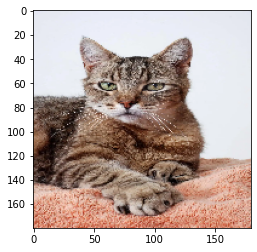

In [8]:
plt.imshow(image_as_np_array.astype("uint8"))
plt.show()

In [9]:
image_as_np_array.shape

(180, 180, 3)

In [10]:
input_image = np.expand_dims(image_as_np_array, axis=0)

In [11]:
input_image.shape

(1, 180, 180, 3)

In [12]:
from tensorflow.keras import layers

In [13]:
all_layers = []
layer_names = []

In [14]:
for layer in model.layers:

  if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
    all_layers.append(layer.output)
    layer_names.append(layer.name)

In [15]:
activation_model = keras.Model(inputs=model.input, outputs=all_layers)

In [16]:
for name in layer_names:
  print(name)

Conv2D1
MaxPool1
Conv2D2
MaxPool2
Conv2D3
MaxPool3
Conv2D4
MaxPool4
Conv2D5


In [17]:
activation_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 180, 180, 3)]     0         
                                                                 
 RF (RandomFlip)             (None, 180, 180, 3)       0         
                                                                 
 RR (RandomRotation)         (None, 180, 180, 3)       0         
                                                                 
 RZ (RandomZoom)             (None, 180, 180, 3)       0         
                                                                 
 Rescaling_Layer (Rescaling)  (None, 180, 180, 3)      0         
                                                                 
 Conv2D1 (Conv2D)            (None, 178, 178, 32)      896       
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 89, 89, 32)        0     

In [18]:
activations = activation_model.predict(input_image)

In [19]:
activations[0].shape

(1, 178, 178, 32)

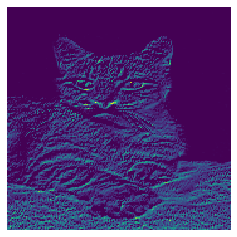

In [20]:
plt.matshow(activations[0][0, :, :, 1], cmap="viridis")
plt.axis("off")
plt.show()

In [21]:
print(np.size(activations[0], 3))

32


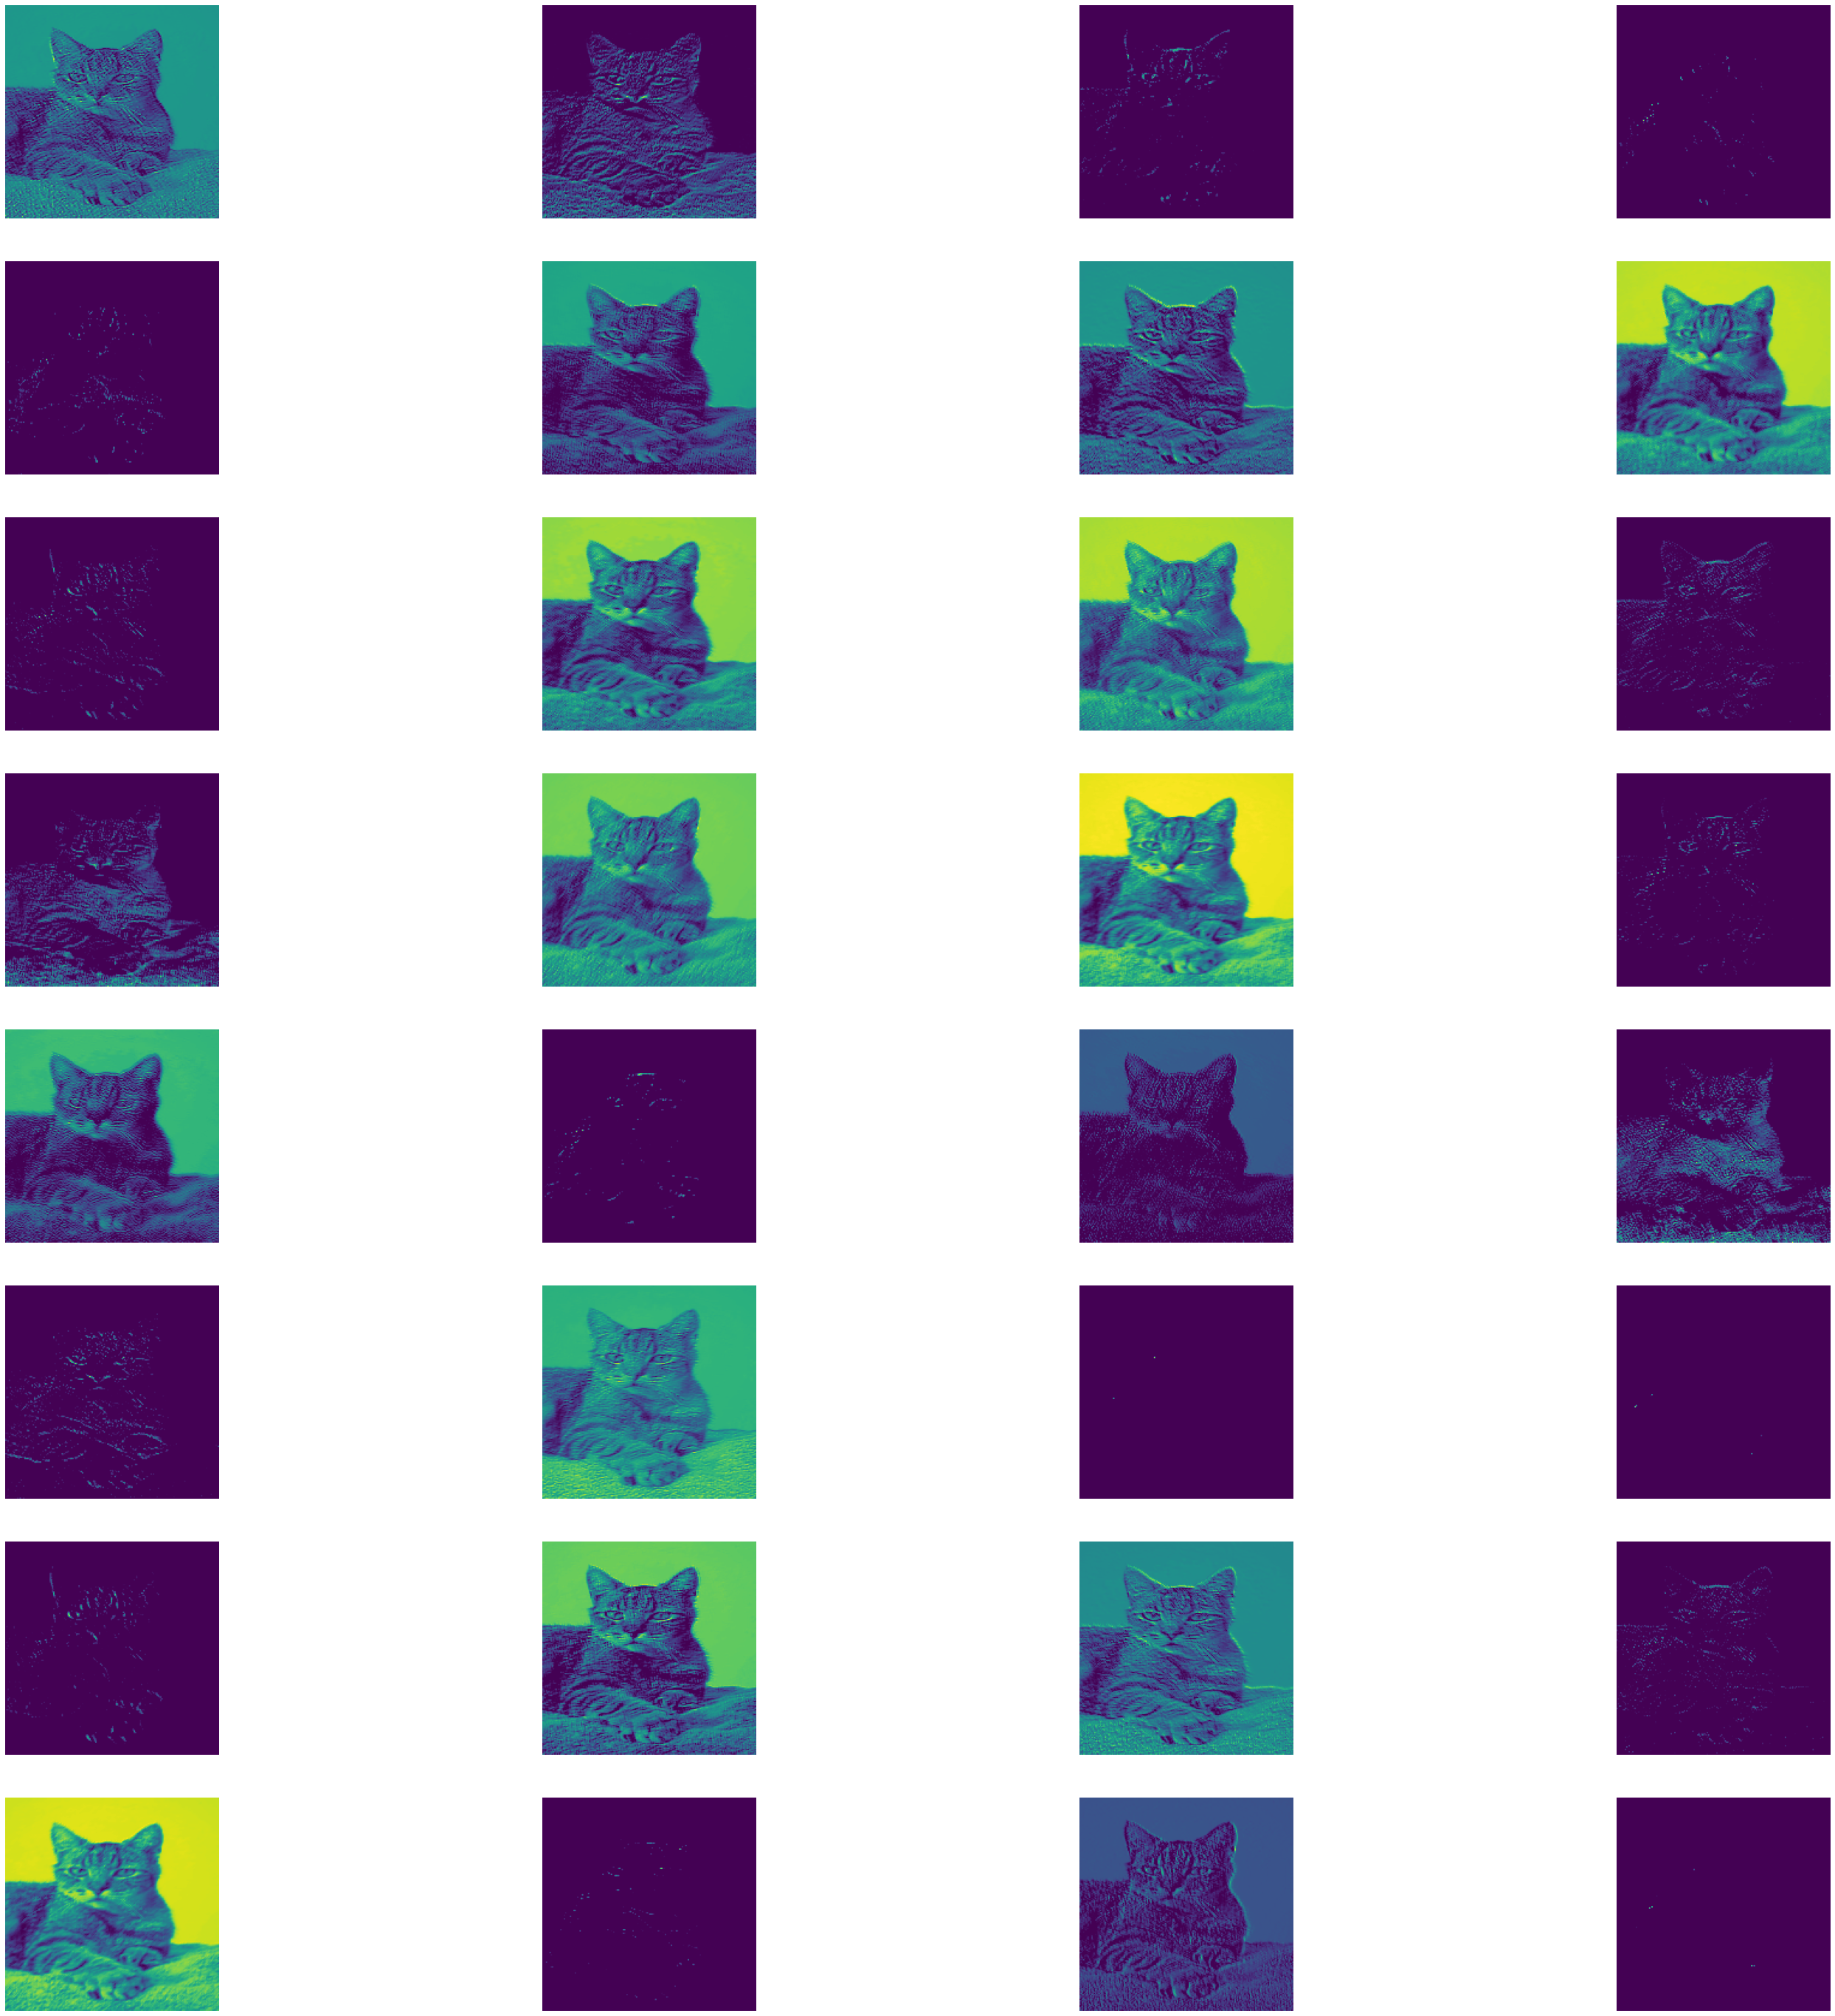

In [22]:
fig = plt.figure(figsize=(50, 50))

size = np.size(activations[0], 3)

for i in range(size):
  fig.add_subplot(8, 4, i+1)
  plt.imshow(activations[0][0, :, :, i])
  plt.axis("off")
plt.show()

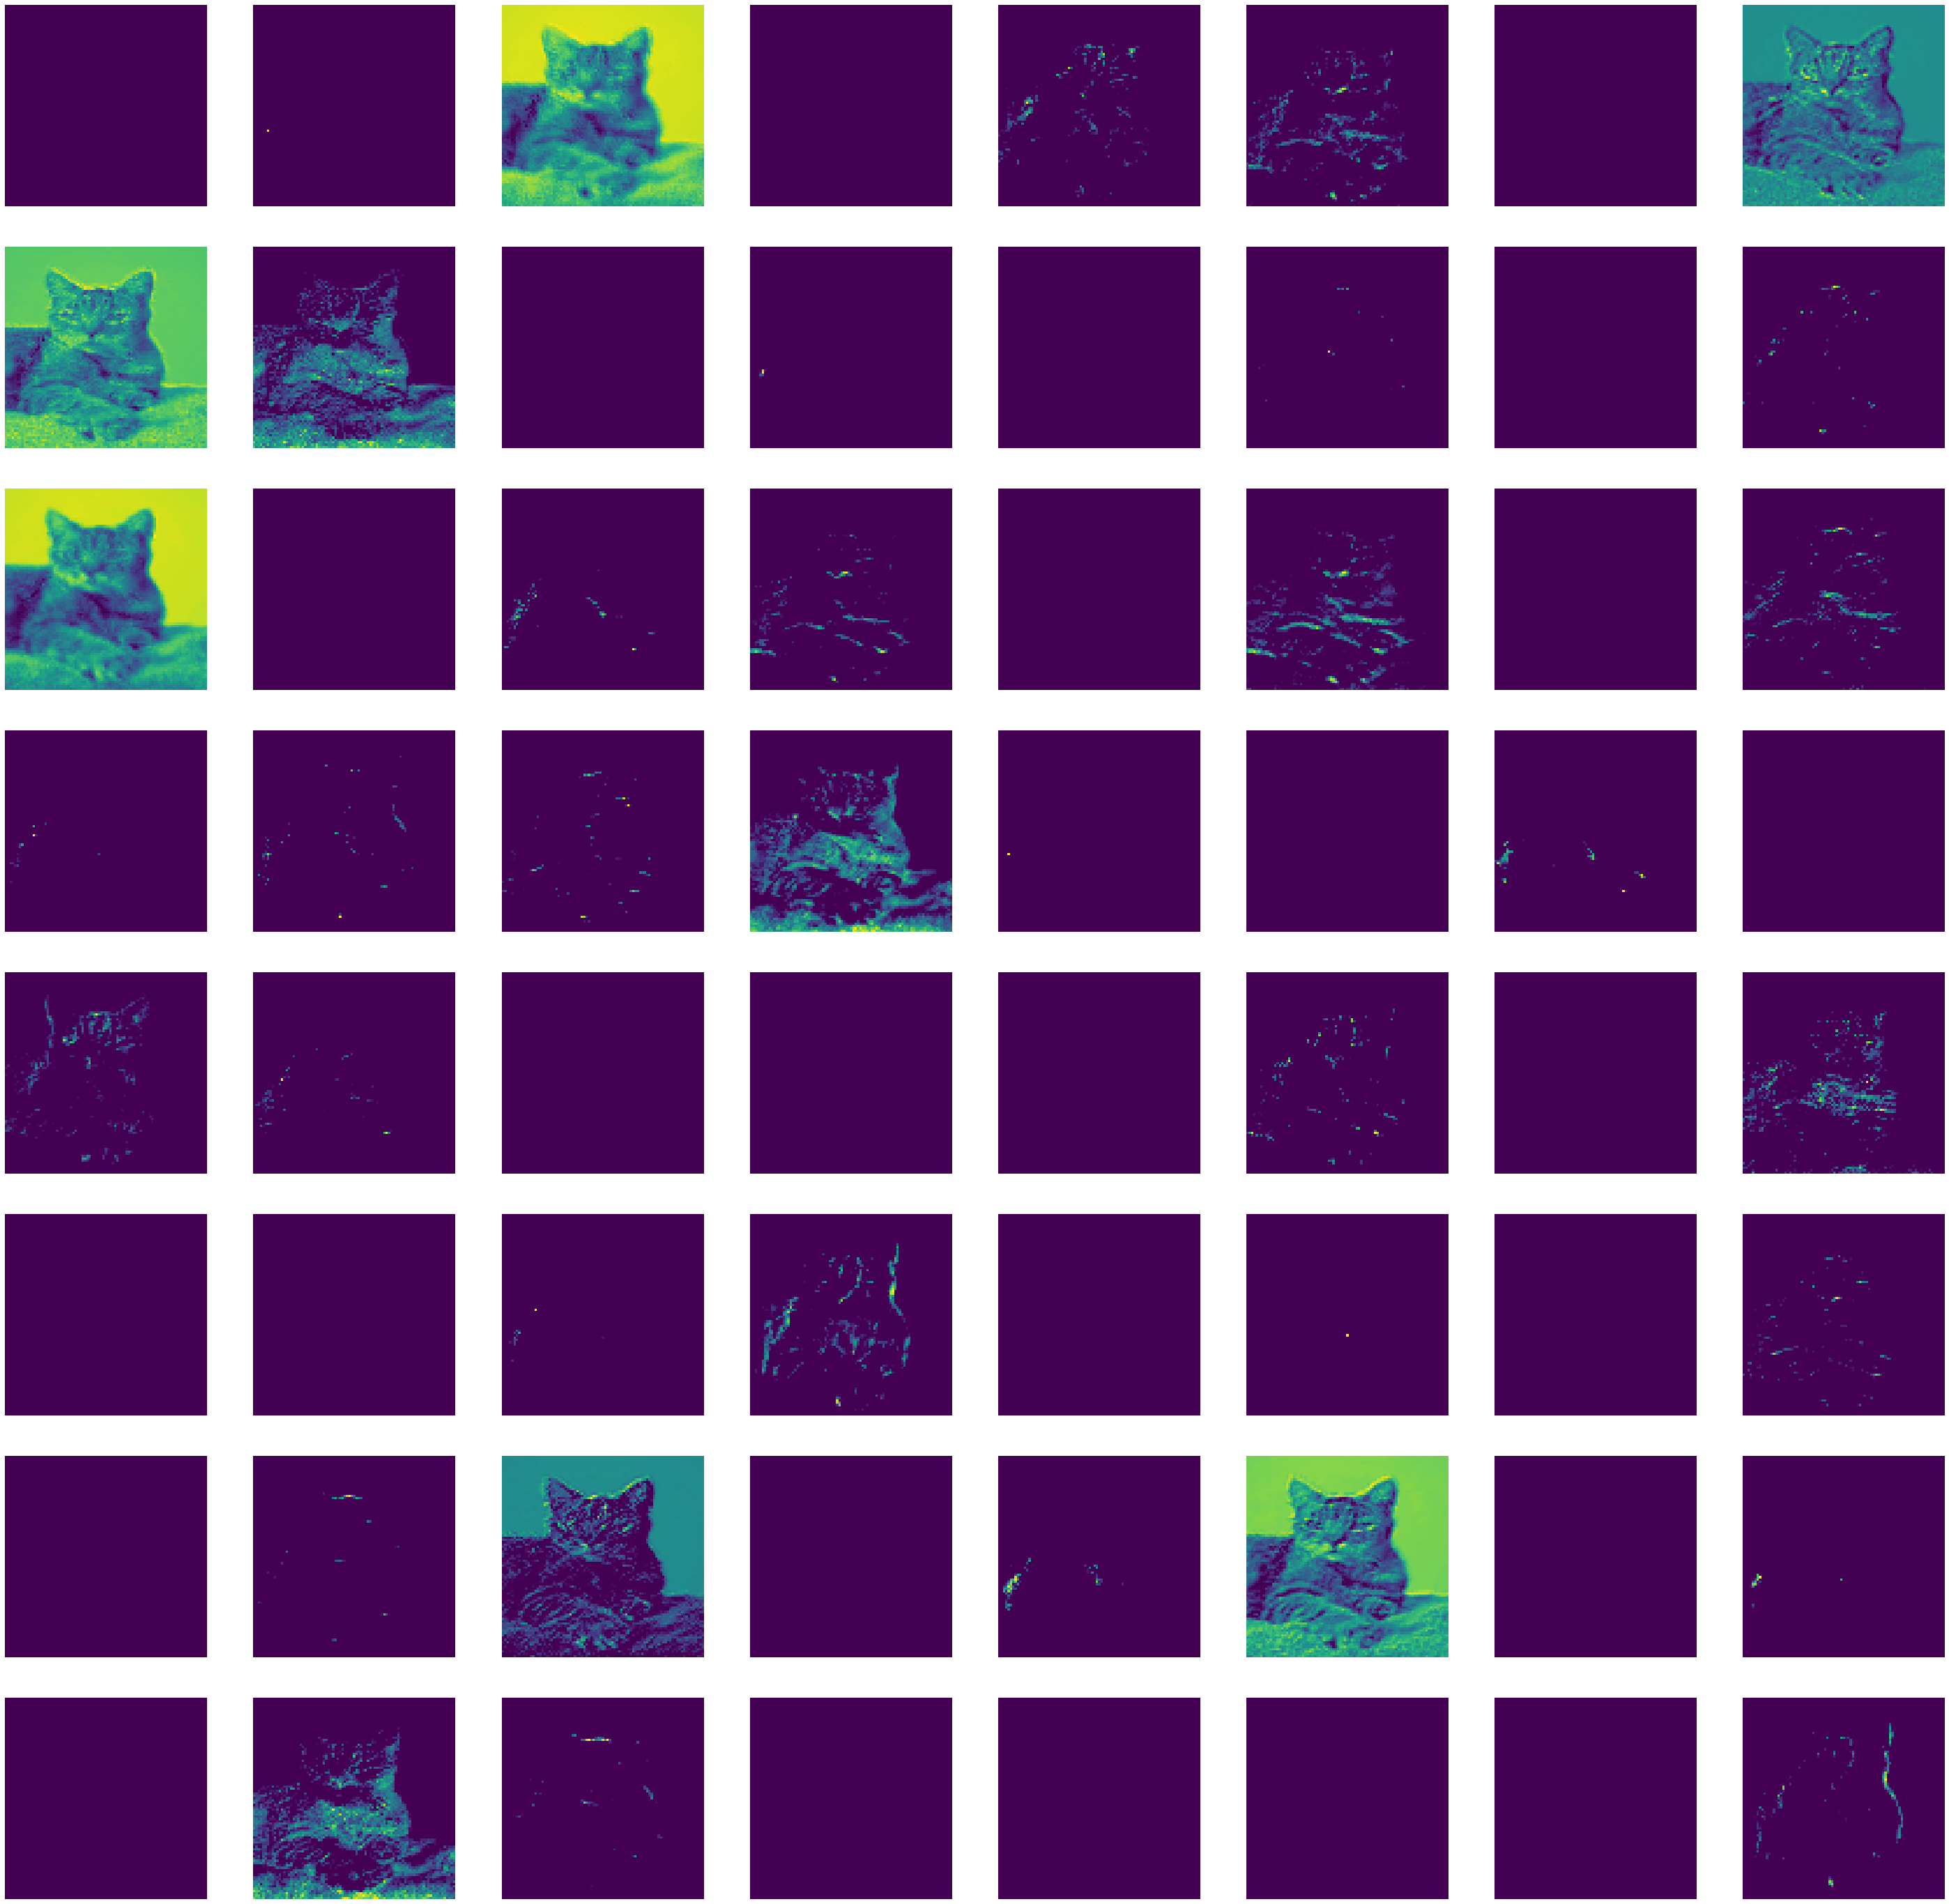

In [42]:
fig = plt.figure(figsize=(50, 50))
size = np.size(activations[2], 3)

for i in range(size):
  plt.subplot(8,8, i+1)
  plt.imshow(activations[2][0, :, :, i])
  plt.axis("off")
plt.show()

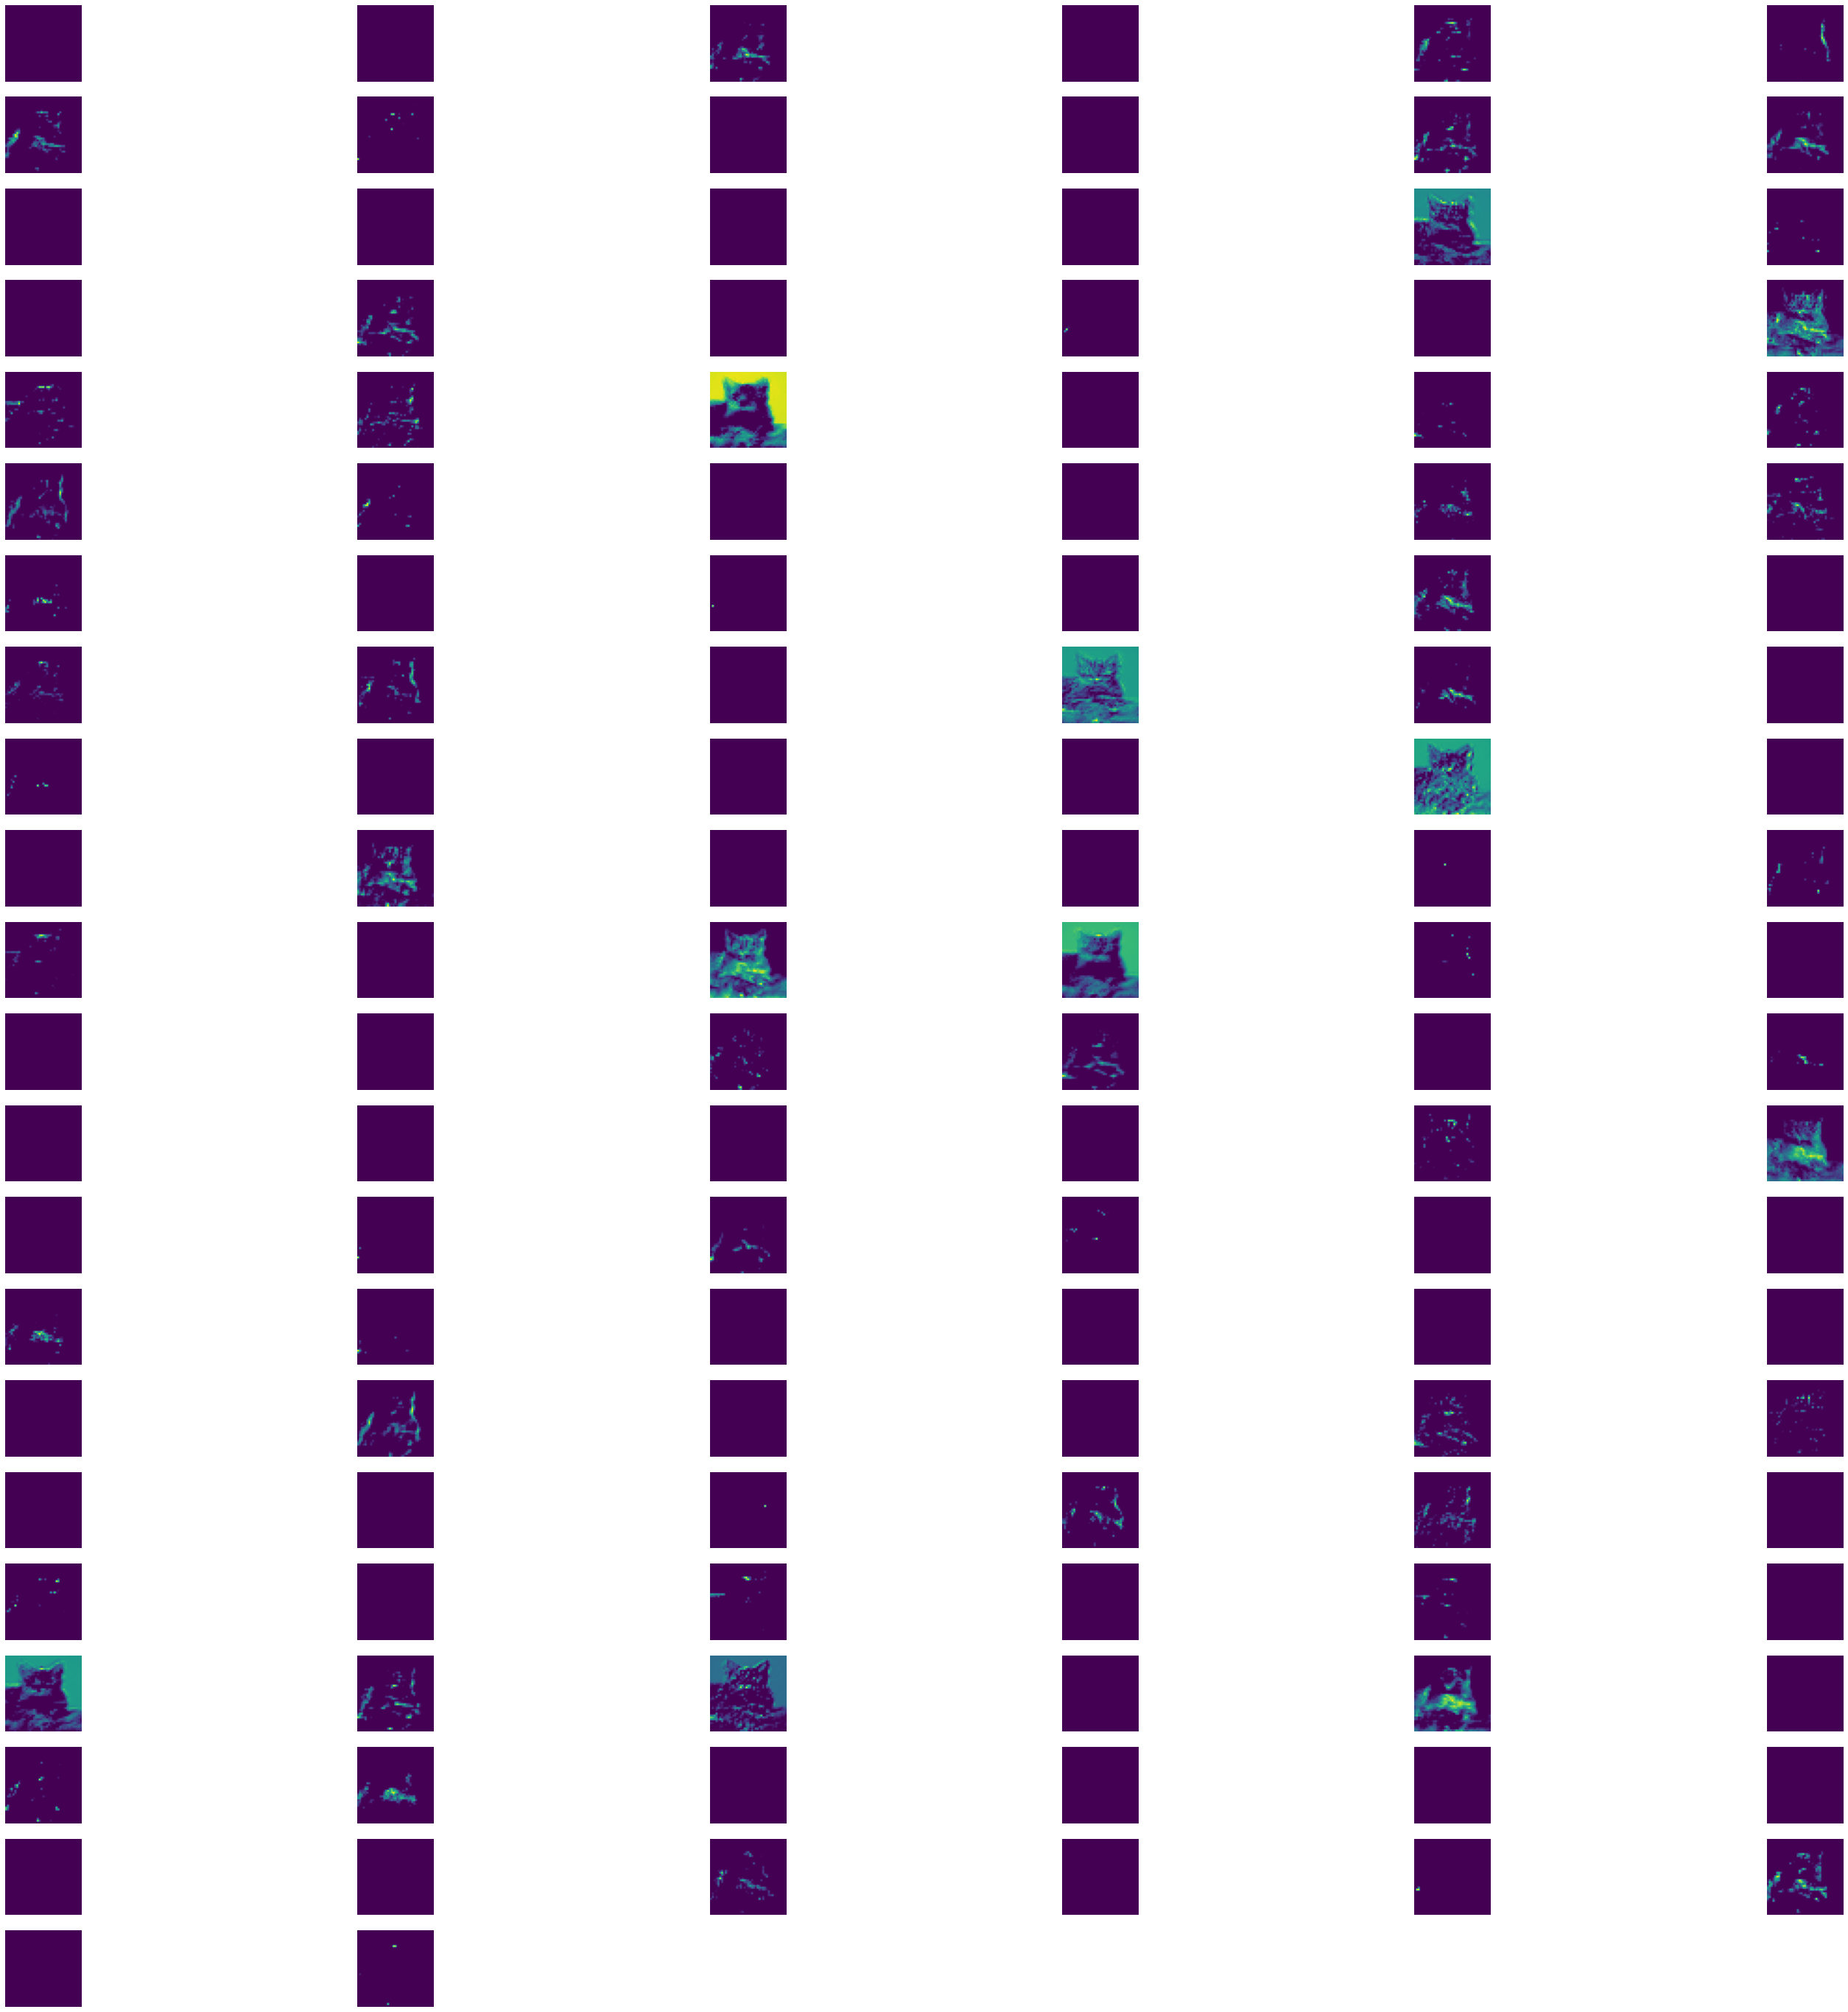

In [46]:
fig = plt.figure(figsize=(50, 50))
size = np.size(activations[4], 3)
i=0
for i in range(size):
  plt.subplot(22,6, i+1)
  plt.imshow(activations[4][0, :, :, i])
  plt.axis("off")
plt.show()